In [ ]:
!unzip Files.zip

Archive:  Files.zip
  inflating: data/test/Angrily Disguisted/Angrily Disguisted0.png  
  inflating: data/test/Angrily Surprised/Angrily Surprised1.png  
  inflating: data/test/Appalled/Appalled2.png  
  inflating: data/test/Awed/Awed3.png  
  inflating: data/test/Disgustedly Surprised/Disgustedly Surprised4.png  
  inflating: data/test/Fearfully Angry/Fearfully Angry5.png  
  inflating: data/test/Fearfully Disguisted/Fearfully Disguisted6.png  
  inflating: data/test/Fearfully Surprised/Fearfully Surprised7.png  
  inflating: data/test/Happily Disguisted/Happily Disguisted8.png  
  inflating: data/test/Happily Surprised/Happily Surprised9.png  
  inflating: data/test/Hatred/Hatred10.png  
  inflating: data/test/Sadly Angry/Sadly Angry11.png  
  inflating: data/test/Sadly Disguisted/Sadly Disguisted12.png  
  inflating: data/test/Sadly Fearful/Sadly Fearful13.png  
  inflating: data/test/Sadly Surprised/Sadly Surprised14.png  
  inflating: data/train/Angrily Disguisted/Angrily Disguist

In [ ]:
accuracy = dict()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (124, 124)
BATCH_SIZE = 64

train_dir = "data/train/"
test_dir =  "data/test/"

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.1,
                                   zoom_range=0.1)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=IMAGE_SHAPE,
                                                batch_size=BATCH_SIZE,
                                                class_mode="categorical",
                                                shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Found 63 images belonging to 15 classes.
Found 15 images belonging to 15 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

In [ ]:

# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = Sequential([
  tf.keras.layers.Input(shape=(124, 124, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="sigmoid", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="sigmoid", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="sigmoid", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="sigmoid", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="sigmoid", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(15, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
history = model_1.fit(train_data, epochs=30, callbacks=[reduce_lr, checkpoint_callback], validation_data=test_data)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 3.5266 - accuracy: 0.0635
Epoch 1: val_loss improved from inf to 4.25769, saving model to checkpoint/


1/1 [==============================] - 5s 5s/step - loss: 3.5266 - accuracy: 0.0635 - val_loss: 4.2577 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 5.0169 - accuracy: 0.1429
Epoch 2: val_loss improved from 4.25769 to 4.09050, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 5.0169 - accuracy: 0.1429 - val_loss: 4.0905 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 4.9573 - accuracy: 0.1111
Epoch 3: val_loss improved from 4.09050 to 3.82051, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 4.9573 - accuracy: 0.1111 - val_loss: 3.8205 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 4.6006 - accuracy: 0.0635
Epoch 4: val_loss improved from 3.82051 to 3.40689, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 4.6006 - accuracy: 0.0635 - val_loss: 3.4069 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 5/30
1/1 [==============================] - ETA: 0s - loss: 4.1465 - accuracy: 0.0476
Epoch 5: val_loss improved from 3.40689 to 3.05358, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 4.1465 - accuracy: 0.0476 - val_loss: 3.0536 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 6/30
1/1 [==============================] - ETA: 0s - loss: 3.2829 - accuracy: 0.0952
Epoch 6: val_loss improved from 3.05358 to 2.83476, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.2829 - accuracy: 0.0952 - val_loss: 2.8348 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 7/30
1/1 [==============================] - ETA: 0s - loss: 3.1334 - accuracy: 0.1111
Epoch 7: val_loss improved from 2.83476 to 2.80361, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.1334 - accuracy: 0.1111 - val_loss: 2.8036 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 8/30
1/1 [==============================] - ETA: 0s - loss: 3.1548 - accuracy: 0.1270
Epoch 8: val_loss did not improve from 2.80361
1/1 [==============================] - 2s 2s/step - loss: 3.1548 - accuracy: 0.1270 - val_loss: 2.8222 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 9/30
1/1 [==============================] - ETA: 0s - loss: 3.3722 - accuracy: 0.1111
Epoch 9: val_loss did not improve from 2.80361
1/1 [==============================] - 2s 2s/step - loss: 3.3722 - accuracy: 0.1111 - val_loss: 2.8277 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 10/30
1/1 [==============================] - ETA: 0s - loss: 3.0103 - accuracy: 0.1587
Epoch 10: val_loss did not improve from 2.80361
1/1 [==============================] - 2s 2s/step - loss: 3.0103 - accuracy: 0.1587 - val_loss: 2.8248 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 11/30
1/1 [====

1/1 [==============================] - 4s 4s/step - loss: 2.9678 - accuracy: 0.1270 - val_loss: 2.8018 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 14/30
1/1 [==============================] - ETA: 0s - loss: 2.9923 - accuracy: 0.0794
Epoch 14: val_loss improved from 2.80179 to 2.79435, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.9923 - accuracy: 0.0794 - val_loss: 2.7944 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 15/30
1/1 [==============================] - ETA: 0s - loss: 2.7874 - accuracy: 0.1111
Epoch 15: val_loss improved from 2.79435 to 2.78784, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.7874 - accuracy: 0.1111 - val_loss: 2.7878 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 16/30
1/1 [==============================] - ETA: 0s - loss: 2.6087 - accuracy: 0.1429
Epoch 16: val_loss improved from 2.78784 to 2.78212, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.6087 - accuracy: 0.1429 - val_loss: 2.7821 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 17/30
1/1 [==============================] - ETA: 0s - loss: 2.7835 - accuracy: 0.1270
Epoch 17: val_loss improved from 2.78212 to 2.77674, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.7835 - accuracy: 0.1270 - val_loss: 2.7767 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 18/30
1/1 [==============================] - ETA: 0s - loss: 2.5995 - accuracy: 0.1746
Epoch 18: val_loss improved from 2.77674 to 2.77568, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.5995 - accuracy: 0.1746 - val_loss: 2.7757 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 19/30
1/1 [==============================] - ETA: 0s - loss: 2.5190 - accuracy: 0.1429
Epoch 19: val_loss improved from 2.77568 to 2.77437, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.5190 - accuracy: 0.1429 - val_loss: 2.7744 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 20/30
1/1 [==============================] - ETA: 0s - loss: 2.7345 - accuracy: 0.0952
Epoch 20: val_loss improved from 2.77437 to 2.77298, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.7345 - accuracy: 0.0952 - val_loss: 2.7730 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 21/30
1/1 [==============================] - ETA: 0s - loss: 2.5650 - accuracy: 0.2222
Epoch 21: val_loss improved from 2.77298 to 2.77138, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.5650 - accuracy: 0.2222 - val_loss: 2.7714 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 22/30
1/1 [==============================] - ETA: 0s - loss: 2.6051 - accuracy: 0.1905
Epoch 22: val_loss improved from 2.77138 to 2.76978, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.6051 - accuracy: 0.1905 - val_loss: 2.7698 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 23/30
1/1 [==============================] - ETA: 0s - loss: 2.5495 - accuracy: 0.1905
Epoch 23: val_loss improved from 2.76978 to 2.76815, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.5495 - accuracy: 0.1905 - val_loss: 2.7681 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 24/30
1/1 [==============================] - ETA: 0s - loss: 2.6877 - accuracy: 0.1111
Epoch 24: val_loss improved from 2.76815 to 2.76646, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.6877 - accuracy: 0.1111 - val_loss: 2.7665 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 25/30
1/1 [==============================] - ETA: 0s - loss: 2.6419 - accuracy: 0.1270
Epoch 25: val_loss improved from 2.76646 to 2.76480, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.6419 - accuracy: 0.1270 - val_loss: 2.7648 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 26/30
1/1 [==============================] - ETA: 0s - loss: 2.5410 - accuracy: 0.1429
Epoch 26: val_loss improved from 2.76480 to 2.76436, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.5410 - accuracy: 0.1429 - val_loss: 2.7644 - val_accuracy: 0.0667 - lr: 1.0000e-05
Epoch 27/30
1/1 [==============================] - ETA: 0s - loss: 2.5778 - accuracy: 0.1270
Epoch 27: val_loss improved from 2.76436 to 2.76391, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.5778 - accuracy: 0.1270 - val_loss: 2.7639 - val_accuracy: 0.0667 - lr: 1.0000e-05
Epoch 28/30
1/1 [==============================] - ETA: 0s - loss: 2.7373 - accuracy: 0.1587
Epoch 28: val_loss improved from 2.76391 to 2.76345, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.7373 - accuracy: 0.1587 - val_loss: 2.7634 - val_accuracy: 0.0667 - lr: 1.0000e-05
Epoch 29/30
1/1 [==============================] - ETA: 0s - loss: 2.7527 - accuracy: 0.1270
Epoch 29: val_loss improved from 2.76345 to 2.76300, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.7527 - accuracy: 0.1270 - val_loss: 2.7630 - val_accuracy: 0.0667 - lr: 1.0000e-05
Epoch 30/30
1/1 [==============================] - ETA: 0s - loss: 2.6442 - accuracy: 0.1746
Epoch 30: val_loss improved from 2.76300 to 2.76255, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 2.6442 - accuracy: 0.1746 - val_loss: 2.7626 - val_accuracy: 0.0667 - lr: 1.0000e-05


In [ ]:
history

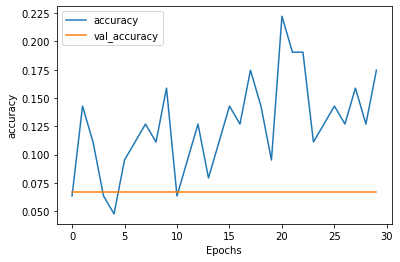

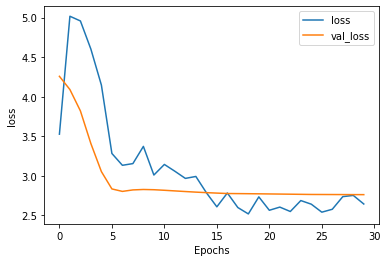

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model_1.save("model_sigmoid_function.h5")

In [ ]:
!ls

checkpoint  data  Files.zip  model_sigmoid.h5  sample_data


In [ ]:

# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = Sequential([
  tf.keras.layers.Input(shape=(124, 124, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(15, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
history = model_1.fit(train_data, epochs=30, callbacks=[reduce_lr, checkpoint_callback], validation_data=test_data)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 9.1593 - accuracy: 0.0635
Epoch 1: val_loss improved from inf to 2.69487, saving model to checkpoint/


1/1 [==============================] - 10s 10s/step - loss: 9.1593 - accuracy: 0.0635 - val_loss: 2.6949 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 12.0553 - accuracy: 0.0794
Epoch 2: val_loss improved from 2.69487 to 2.68540, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 12.0553 - accuracy: 0.0794 - val_loss: 2.6854 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 11.0193 - accuracy: 0.0952
Epoch 3: val_loss did not improve from 2.68540
1/1 [==============================] - 2s 2s/step - loss: 11.0193 - accuracy: 0.0952 - val_loss: 2.6913 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 7.3779 - accuracy: 0.0952
Epoch 4: val_loss did not improve from 2.68540
1/1 [==============================] - 2s 2s/step - loss: 7.3779 - accuracy: 0.0952 - val_loss: 2.7003 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 5/30
1/1 [==============================] - ETA: 0s - loss: 7.3470 - accuracy: 0.1270
Epoch 5: val_loss did not improve from 2.68540
1/1 [==============================] - 2s 2s/step - loss: 7.3470 - accuracy: 0.1270 - val_loss: 2.6984 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 6/30
1/1 [========

1/1 [==============================] - 4s 4s/step - loss: 5.6001 - accuracy: 0.2222 - val_loss: 2.6789 - val_accuracy: 0.1333 - lr: 0.0010
Epoch 7/30
1/1 [==============================] - ETA: 0s - loss: 5.4111 - accuracy: 0.1587
Epoch 7: val_loss improved from 2.67893 to 2.65315, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 5.4111 - accuracy: 0.1587 - val_loss: 2.6532 - val_accuracy: 0.1333 - lr: 0.0010
Epoch 8/30
1/1 [==============================] - ETA: 0s - loss: 5.8196 - accuracy: 0.0794
Epoch 8: val_loss did not improve from 2.65315
1/1 [==============================] - 2s 2s/step - loss: 5.8196 - accuracy: 0.0794 - val_loss: 2.6588 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 9/30
1/1 [==============================] - ETA: 0s - loss: 4.8513 - accuracy: 0.0952
Epoch 9: val_loss did not improve from 2.65315
1/1 [==============================] - 2s 2s/step - loss: 4.8513 - accuracy: 0.0952 - val_loss: 2.7021 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 10/30
1/1 [==============================] - ETA: 0s - loss: 3.9146 - accuracy: 0.1587
Epoch 10: val_loss did not improve from 2.65315
1/1 [==============================] - 2s 2s/step - loss: 3.9146 - accuracy: 0.1587 - val_loss: 2.7308 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 11/30
1/1 [========

1/1 [==============================] - 4s 4s/step - loss: 4.0424 - accuracy: 0.1905 - val_loss: 2.6521 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 14/30
1/1 [==============================] - ETA: 0s - loss: 3.5000 - accuracy: 0.2381
Epoch 14: val_loss improved from 2.65206 to 2.64417, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.5000 - accuracy: 0.2381 - val_loss: 2.6442 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 15/30
1/1 [==============================] - ETA: 0s - loss: 3.3840 - accuracy: 0.1746
Epoch 15: val_loss did not improve from 2.64417
1/1 [==============================] - 2s 2s/step - loss: 3.3840 - accuracy: 0.1746 - val_loss: 2.6466 - val_accuracy: 0.1333 - lr: 2.0000e-04
Epoch 16/30
1/1 [==============================] - ETA: 0s - loss: 3.7153 - accuracy: 0.1746
Epoch 16: val_loss did not improve from 2.64417
1/1 [==============================] - 2s 2s/step - loss: 3.7153 - accuracy: 0.1746 - val_loss: 2.6501 - val_accuracy: 0.1333 - lr: 2.0000e-04
Epoch 17/30
1/1 [==============================] - ETA: 0s - loss: 3.2155 - accuracy: 0.1746
Epoch 17: val_loss did not improve from 2.64417
1/1 [==============================] - 2s 2s/step - loss: 3.2155 - accuracy: 0.1746 - val_loss: 2.6546 - val_accuracy: 0.1333 - lr: 2.0000e-04
Epoch 18/

1/1 [==============================] - 4s 4s/step - loss: 3.2060 - accuracy: 0.2063 - val_loss: 2.6355 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 22/30
1/1 [==============================] - ETA: 0s - loss: 3.6794 - accuracy: 0.0952
Epoch 22: val_loss improved from 2.63555 to 2.62657, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.6794 - accuracy: 0.0952 - val_loss: 2.6266 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 23/30
1/1 [==============================] - ETA: 0s - loss: 3.1114 - accuracy: 0.1270
Epoch 23: val_loss improved from 2.62657 to 2.62281, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.1114 - accuracy: 0.1270 - val_loss: 2.6228 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 24/30
1/1 [==============================] - ETA: 0s - loss: 3.2026 - accuracy: 0.1429
Epoch 24: val_loss improved from 2.62281 to 2.62075, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.2026 - accuracy: 0.1429 - val_loss: 2.6208 - val_accuracy: 0.1333 - lr: 4.0000e-05
Epoch 25/30
1/1 [==============================] - ETA: 0s - loss: 3.1813 - accuracy: 0.1270
Epoch 25: val_loss improved from 2.62075 to 2.62023, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.1813 - accuracy: 0.1270 - val_loss: 2.6202 - val_accuracy: 0.1333 - lr: 4.0000e-05
Epoch 26/30
1/1 [==============================] - ETA: 0s - loss: 2.7925 - accuracy: 0.2063
Epoch 26: val_loss did not improve from 2.62023
1/1 [==============================] - 2s 2s/step - loss: 2.7925 - accuracy: 0.2063 - val_loss: 2.6212 - val_accuracy: 0.1333 - lr: 4.0000e-05
Epoch 27/30
1/1 [==============================] - ETA: 0s - loss: 2.7921 - accuracy: 0.2222
Epoch 27: val_loss did not improve from 2.62023
1/1 [==============================] - 2s 2s/step - loss: 2.7921 - accuracy: 0.2222 - val_loss: 2.6236 - val_accuracy: 0.1333 - lr: 4.0000e-05
Epoch 28/30
1/1 [==============================] - ETA: 0s - loss: 3.0430 - accuracy: 0.2063
Epoch 28: val_loss did not improve from 2.62023
1/1 [==============================] - 2s 2s/step - loss: 3.0430 - accuracy: 0.2063 - val_loss: 2.6246 - val_accuracy: 0.1333 - lr: 4.0000e-05
Epoch

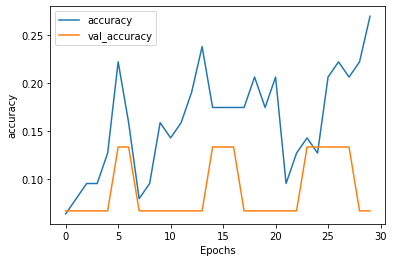

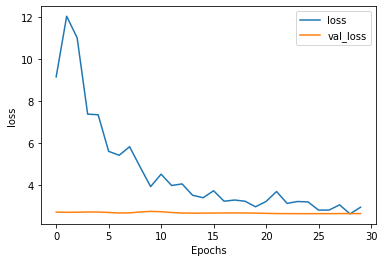

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model_1.save("model_relu.h5")

In [ ]:

# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = Sequential([
  tf.keras.layers.Input(shape=(124, 124, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="softplus", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="softplus", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="softplus", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="softplus", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="softplus", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(15, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
history = model_1.fit(train_data, epochs=30, callbacks=[reduce_lr, checkpoint_callback], validation_data=test_data)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 8.2628 - accuracy: 0.1270
Epoch 1: val_loss improved from inf to 6.16840, saving model to checkpoint/


1/1 [==============================] - 5s 5s/step - loss: 8.2628 - accuracy: 0.1270 - val_loss: 6.1684 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 13.3778 - accuracy: 0.1111
Epoch 2: val_loss improved from 6.16840 to 5.46323, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 13.3778 - accuracy: 0.1111 - val_loss: 5.4632 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 13.1230 - accuracy: 0.1270
Epoch 3: val_loss improved from 5.46323 to 4.67580, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 13.1230 - accuracy: 0.1270 - val_loss: 4.6758 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 10.6953 - accuracy: 0.0794
Epoch 4: val_loss improved from 4.67580 to 4.12064, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 10.6953 - accuracy: 0.0794 - val_loss: 4.1206 - val_accuracy: 0.1333 - lr: 0.0010
Epoch 5/30
1/1 [==============================] - ETA: 0s - loss: 7.8735 - accuracy: 0.1111
Epoch 5: val_loss improved from 4.12064 to 3.94872, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 7.8735 - accuracy: 0.1111 - val_loss: 3.9487 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 6/30
1/1 [==============================] - ETA: 0s - loss: 7.5319 - accuracy: 0.0952
Epoch 6: val_loss improved from 3.94872 to 3.81697, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 7.5319 - accuracy: 0.0952 - val_loss: 3.8170 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 7/30
1/1 [==============================] - ETA: 0s - loss: 7.5055 - accuracy: 0.1270
Epoch 7: val_loss improved from 3.81697 to 3.58073, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 7.5055 - accuracy: 0.1270 - val_loss: 3.5807 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 8/30
1/1 [==============================] - ETA: 0s - loss: 6.5611 - accuracy: 0.1429
Epoch 8: val_loss improved from 3.58073 to 3.32698, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 6.5611 - accuracy: 0.1429 - val_loss: 3.3270 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 9/30
1/1 [==============================] - ETA: 0s - loss: 6.0790 - accuracy: 0.1429
Epoch 9: val_loss improved from 3.32698 to 3.14771, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 6.0790 - accuracy: 0.1429 - val_loss: 3.1477 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 10/30
1/1 [==============================] - ETA: 0s - loss: 5.6197 - accuracy: 0.1111
Epoch 10: val_loss improved from 3.14771 to 3.06231, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 5.6197 - accuracy: 0.1111 - val_loss: 3.0623 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 11/30
1/1 [==============================] - ETA: 0s - loss: 6.2672 - accuracy: 0.0952
Epoch 11: val_loss improved from 3.06231 to 3.02556, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 6.2672 - accuracy: 0.0952 - val_loss: 3.0256 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 12/30
1/1 [==============================] - ETA: 0s - loss: 4.8736 - accuracy: 0.1587
Epoch 12: val_loss improved from 3.02556 to 2.98927, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 4.8736 - accuracy: 0.1587 - val_loss: 2.9893 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 13/30
1/1 [==============================] - ETA: 0s - loss: 4.7175 - accuracy: 0.1111
Epoch 13: val_loss improved from 2.98927 to 2.98176, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 4.7175 - accuracy: 0.1111 - val_loss: 2.9818 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 14/30
1/1 [==============================] - ETA: 0s - loss: 4.1529 - accuracy: 0.1746
Epoch 14: val_loss improved from 2.98176 to 2.97337, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 4.1529 - accuracy: 0.1746 - val_loss: 2.9734 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 15/30
1/1 [==============================] - ETA: 0s - loss: 4.2781 - accuracy: 0.1270
Epoch 15: val_loss improved from 2.97337 to 2.96451, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 4.2781 - accuracy: 0.1270 - val_loss: 2.9645 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 16/30
1/1 [==============================] - ETA: 0s - loss: 4.2090 - accuracy: 0.1270
Epoch 16: val_loss improved from 2.96451 to 2.95546, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 4.2090 - accuracy: 0.1270 - val_loss: 2.9555 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 17/30
1/1 [==============================] - ETA: 0s - loss: 3.9929 - accuracy: 0.1746
Epoch 17: val_loss improved from 2.95546 to 2.94459, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.9929 - accuracy: 0.1746 - val_loss: 2.9446 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 18/30
1/1 [==============================] - ETA: 0s - loss: 3.9855 - accuracy: 0.1587
Epoch 18: val_loss improved from 2.94459 to 2.93305, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.9855 - accuracy: 0.1587 - val_loss: 2.9331 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 19/30
1/1 [==============================] - ETA: 0s - loss: 3.7112 - accuracy: 0.1587
Epoch 19: val_loss improved from 2.93305 to 2.92004, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.7112 - accuracy: 0.1587 - val_loss: 2.9200 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 20/30
1/1 [==============================] - ETA: 0s - loss: 4.0170 - accuracy: 0.1270
Epoch 20: val_loss improved from 2.92004 to 2.90750, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 4.0170 - accuracy: 0.1270 - val_loss: 2.9075 - val_accuracy: 0.0667 - lr: 2.0000e-04
Epoch 21/30
1/1 [==============================] - ETA: 0s - loss: 3.6105 - accuracy: 0.1587
Epoch 21: val_loss improved from 2.90750 to 2.90509, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.6105 - accuracy: 0.1587 - val_loss: 2.9051 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 22/30
1/1 [==============================] - ETA: 0s - loss: 3.6345 - accuracy: 0.1429
Epoch 22: val_loss improved from 2.90509 to 2.90273, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.6345 - accuracy: 0.1429 - val_loss: 2.9027 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 23/30
1/1 [==============================] - ETA: 0s - loss: 3.6700 - accuracy: 0.1587
Epoch 23: val_loss improved from 2.90273 to 2.90066, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.6700 - accuracy: 0.1587 - val_loss: 2.9007 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 24/30
1/1 [==============================] - ETA: 0s - loss: 3.7297 - accuracy: 0.1429
Epoch 24: val_loss improved from 2.90066 to 2.89862, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.7297 - accuracy: 0.1429 - val_loss: 2.8986 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 25/30
1/1 [==============================] - ETA: 0s - loss: 3.9647 - accuracy: 0.1429
Epoch 25: val_loss improved from 2.89862 to 2.89648, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.9647 - accuracy: 0.1429 - val_loss: 2.8965 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 26/30
1/1 [==============================] - ETA: 0s - loss: 3.4652 - accuracy: 0.1905
Epoch 26: val_loss improved from 2.89648 to 2.89441, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.4652 - accuracy: 0.1905 - val_loss: 2.8944 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 27/30
1/1 [==============================] - ETA: 0s - loss: 3.2650 - accuracy: 0.2222
Epoch 27: val_loss improved from 2.89441 to 2.89248, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.2650 - accuracy: 0.2222 - val_loss: 2.8925 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 28/30
1/1 [==============================] - ETA: 0s - loss: 3.4130 - accuracy: 0.2063
Epoch 28: val_loss improved from 2.89248 to 2.89052, saving model to checkpoint/


1/1 [==============================] - 4s 4s/step - loss: 3.4130 - accuracy: 0.2063 - val_loss: 2.8905 - val_accuracy: 0.0667 - lr: 4.0000e-05
Epoch 29/30
1/1 [==============================] - ETA: 0s - loss: 3.5674 - accuracy: 0.1429
Epoch 29: val_loss did not improve from 2.89052
1/1 [==============================] - 2s 2s/step - loss: 3.5674 - accuracy: 0.1429 - val_loss: 2.8911 - val_accuracy: 0.0667 - lr: 1.0000e-05
Epoch 30/30
1/1 [==============================] - ETA: 0s - loss: 3.4814 - accuracy: 0.1746
Epoch 30: val_loss did not improve from 2.89052
1/1 [==============================] - 2s 2s/step - loss: 3.4814 - accuracy: 0.1746 - val_loss: 2.8917 - val_accuracy: 0.0667 - lr: 1.0000e-05


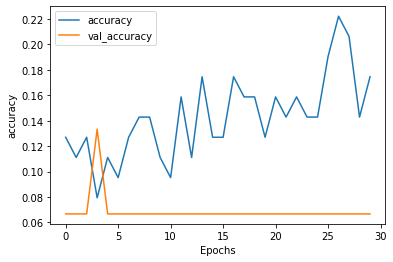

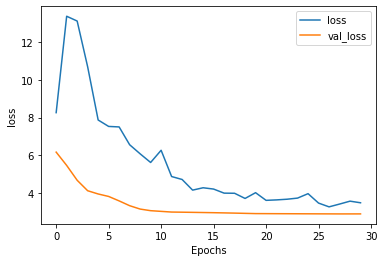

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model_1.save("model_softplus.h5")

In [ ]:

# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = Sequential([
  tf.keras.layers.Input(shape=(124, 124, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="tanh", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="tanh", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="tanh", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="tanh", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="tanh", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(15, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
history = model_1.fit(train_data, epochs=30, callbacks=[reduce_lr, checkpoint_callback], validation_data=test_data)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 3.6997 - accuracy: 0.0476
Epoch 1: val_loss improved from inf to 2.79876, saving model to checkpoint/


1/1 [==============================] - 5s 5s/step - loss: 3.6997 - accuracy: 0.0476 - val_loss: 2.7988 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 4.1310 - accuracy: 0.1429
Epoch 2: val_loss did not improve from 2.79876
1/1 [==============================] - 2s 2s/step - loss: 4.1310 - accuracy: 0.1429 - val_loss: 2.9031 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 4.5910 - accuracy: 0.0635
Epoch 3: val_loss did not improve from 2.79876
1/1 [==============================] - 2s 2s/step - loss: 4.5910 - accuracy: 0.0635 - val_loss: 3.0349 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 3.7023 - accuracy: 0.0635
Epoch 4: val_loss did not improve from 2.79876
1/1 [==============================] - 2s 2s/step - loss: 3.7023 - accuracy: 0.0635 - val_loss: 3.3081 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 5/30
1/1 [===========

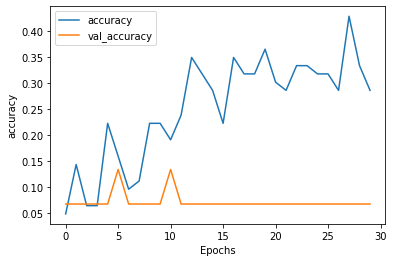

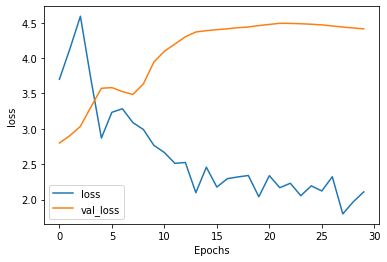

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model_1.save("model_tanh.h5")

In [ ]:

# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = Sequential([
  tf.keras.layers.Input(shape=(124, 124, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="selu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="selu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="selu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="selu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="selu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(15, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
history = model_1.fit(train_data, epochs=30, callbacks=[reduce_lr, checkpoint_callback], validation_data=test_data)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 7.4204 - accuracy: 0.0635
Epoch 1: val_loss improved from inf to 4.05727, saving model to checkpoint/


1/1 [==============================] - 5s 5s/step - loss: 7.4204 - accuracy: 0.0635 - val_loss: 4.0573 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 9.9702 - accuracy: 0.1111
Epoch 2: val_loss did not improve from 4.05727
1/1 [==============================] - 2s 2s/step - loss: 9.9702 - accuracy: 0.1111 - val_loss: 6.0167 - val_accuracy: 0.1333 - lr: 0.0010
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 8.7932 - accuracy: 0.0476
Epoch 3: val_loss did not improve from 4.05727
1/1 [==============================] - 2s 2s/step - loss: 8.7932 - accuracy: 0.0476 - val_loss: 6.9447 - val_accuracy: 0.1333 - lr: 0.0010
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 7.2233 - accuracy: 0.1270
Epoch 4: val_loss did not improve from 4.05727
1/1 [==============================] - 2s 2s/step - loss: 7.2233 - accuracy: 0.1270 - val_loss: 9.2963 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 5/30
1/1 [===========

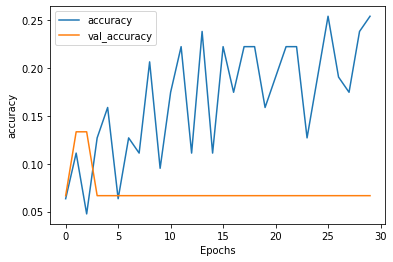

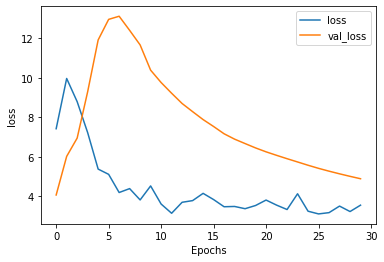

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model_1.save("model_selu.h5")

In [ ]:

# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = Sequential([
  tf.keras.layers.Input(shape=(124, 124, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="elu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="elu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="elu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="elu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="elu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(15, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
history = model_1.fit(train_data, epochs=30, callbacks=[reduce_lr, checkpoint_callback], validation_data=test_data)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 8.0070 - accuracy: 0.0635
Epoch 1: val_loss improved from inf to 2.77750, saving model to checkpoint/


1/1 [==============================] - 5s 5s/step - loss: 8.0070 - accuracy: 0.0635 - val_loss: 2.7775 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 11.3816 - accuracy: 0.1429
Epoch 2: val_loss did not improve from 2.77750
1/1 [==============================] - 2s 2s/step - loss: 11.3816 - accuracy: 0.1429 - val_loss: 2.9725 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 10.2206 - accuracy: 0.0317
Epoch 3: val_loss did not improve from 2.77750
1/1 [==============================] - 2s 2s/step - loss: 10.2206 - accuracy: 0.0317 - val_loss: 3.3839 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 6.1547 - accuracy: 0.0952
Epoch 4: val_loss did not improve from 2.77750
1/1 [==============================] - 2s 2s/step - loss: 6.1547 - accuracy: 0.0952 - val_loss: 4.1378 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 5/30
1/1 [=======

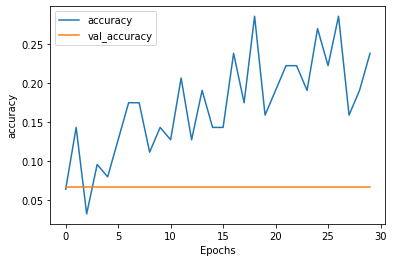

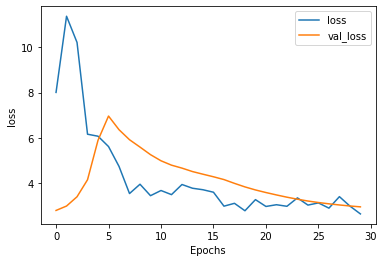

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model_1.save("model_elu.h5")

In [ ]:
# exponential

In [ ]:

# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = Sequential([
  tf.keras.layers.Input(shape=(124, 124, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="exponential", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="exponential", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="exponential", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="exponential", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="exponential", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(15, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
history = model_1.fit(train_data, epochs=30, callbacks=[reduce_lr, checkpoint_callback], validation_data=test_data)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1429
Epoch 1: val_loss did not improve from inf
1/1 [==============================] - 3s 3s/step - loss: nan - accuracy: 0.1429 - val_loss: nan - val_accuracy: 0.0667 - lr: 0.0010
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1429
Epoch 2: val_loss did not improve from inf
1/1 [==============================] - 2s 2s/step - loss: nan - accuracy: 0.1429 - val_loss: nan - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1429
Epoch 3: val_loss did not improve from inf
1/1 [==============================] - 2s 2s/step - loss: nan - accuracy: 0.1429 - val_loss: nan - val_accuracy: 0.0667 - lr: 0.0010
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1429
Epoch 4: val_loss did not improve from inf
1/1 [==============================] - 2s 2s/step - loss: nan - accuracy:

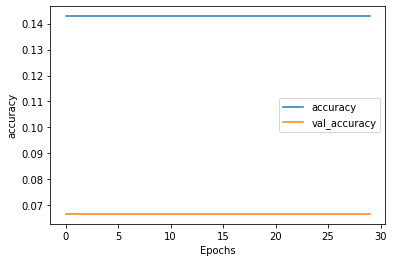

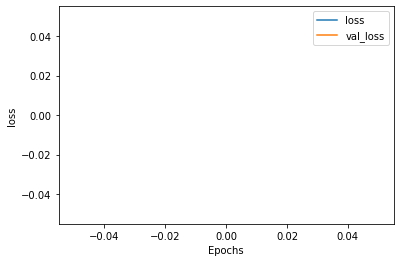

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model_1.save("model_exponential.h5")

In [13]:
accuracy

,model,accuracy
3,tanh,0.4286
5,elu,0.2857
1,relu,0.2701
0,sigmoid,0.2698
4,selu,0.2540
2,softplus,0.2236
6,exponential,0.1429
